Opciones
1.- Test de Kolmogorov-Smirnov
2.- Test de Rachas
3.- Test de Chi-cuadrado
Elija una opcion: 3
Escoja el generador a probar: 
Opciones
1.- RANDU
2.- Sinclair ZX81
3.- Numerical Recipes
4.-Borland C/C++
Opcion: 4
Inserte la cantidad de numeros a generar n: 10000
65969


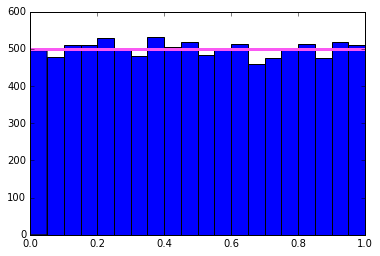

Hipotesis rechazada. Generador NO UNIFORME. Estadistico x2:  7248.0


In [10]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time


def kolmogorov():
    
    #Generador de numeros aleatorios
    
    print('Escoja el generador a probar: ')
    print("Opciones\n1.- RANDU\n2.- Sinclair ZX81\n3.- Numerical Recipes\n4.-Borland C/C++")
    seleccion = raw_input("Opcion: ")
    generadores = { '1': randu, '2': sinclair, '3': numericalRecipes, '4': borland}
    n = int(raw_input("Inserte la cantidad de numeros a generar n: "))
    x = generadores[seleccion](n)
    # Teoretical CDF for Uniform distribution F(x)
    u = [1.0] * n
    
    # Graficar distribucion empirirca f(x)
    count, bins, ignored = plt.hist(x, 10, normed=True)
    plt.plot(bins, np.ones_like(bins), linewidth=3, color = '#FA58F4')
    plt.show()
    # Generamos la distribucion acumulada de una distribucion uniforme con parametros 0 y 1, para n valores.
    x1 = np.arange(1/(n+0.0),1+1/(n+0.0),1/(n+0.0))
    y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))
    #Generamos distribucion acumulada del generador que estamos evaluando para N valores.
    x2 = np.sort(x)
    y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))

    De=np.absolute(y2-y1)
    print("De = ",np.max(De))
    
    # Plotting
    plt.plot(x1,y1,label='Uniforme')
    plt.step(x2,y2,label='Aleatoria')
    x3 = [x1[De.argmax()],x1[De.argmax()]]
    y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
    plt.step(x3,y3,label='De')
    
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Probabilidad acumulada P(X)')
    Da = (1.36/(n**0.5)+0.0)
    if np.max(De)< Da:
        print 'El generador probado es UNIFORME, hipotesis aceptada, De: ',np.max(De),' menor que Da: ',Da
    else:
        print 'Hipotesis rechazada, generador NO UNIFORME. Da: ',Da
    print 'Nivel de significacion a: ',(0.05)
        
    
def rachas():
    
    print('Escoja el generador a probar: ')
    print("Opciones\n1.- RANDU\n2.- Sinclair ZX81\n3.- Numerical Recipes\n4.-Borland C/C++")
    seleccion = raw_input("Opcion: ")
    generadores = { '1': randu, '2': sinclair, '3': numericalRecipes, '4': borland}
    n = int(raw_input("Inserte la cantidad de numeros a generar n: "))
    x = generadores[seleccion](n)
    
    #Test de rachas
    creciente = True
    rachasCrecientes = 0
    rachasDecrecientes = 0
    #x = [1,2,5,3,4,6,2,1,10,11,9,8,7,6] Distribucion de prueba
    for i in range(len(x)):
        if(i == 0):
            if(x[i]<x[i+1]):
                creciente = True
                rachasCrecientes += 1
            else:
                creciente = False
                rachasDecrecientes += 1
        else:
            if(creciente == True):
                if(x[i]<x[i-1]):
                    rachasDecrecientes += 1
                    creciente = False
            else:
                if(x[i]>x[i-1]):
                    rachasCrecientes += 1
                    creciente = True
    # R numero de rachas
    R = rachasCrecientes + rachasDecrecientes
    print 'Rachas Crecientes: ',rachasCrecientes
    print 'Rachas Decrecientes: ',rachasDecrecientes
    print 'Total de Rachas R: ',R
    
    #Z estadistico de contraste
    Z = (R-(2*n-1)/3)/((16*n-29)/90)**0.5
    #print Z
    print'Nivel de confianza a: ',(0.05)
    if(abs(Z) < 0.50978):
        print'El generador probado es ALEATORIO. Hipotesis aceptada. Z: ',Z
    else:
        print 'El generador probado es NO ALEATORIO. Hipotesis rechazada. Z: ',Z
                    
def chicuadrado():
    
    print('Escoja el generador a probar: ')
    print("Opciones\n1.- RANDU\n2.- Sinclair ZX81\n3.- Numerical Recipes\n4.-Borland C/C++")
    seleccion = raw_input("Opcion: ")
    generadores = { '1': randu, '2': sinclair, '3': numericalRecipes, '4': borland}
    n = int(raw_input("Inserte la cantidad de numeros a generar n: "))
    x = generadores[seleccion](n)
    k = 20
    fi, clases, nadaimportante = plt.hist(x, k)
    # fi = observaciones encontradas, ei= observaciones esperadas
    ei = np.ones_like(clases)*(n/k)

    plt.plot(clases, ei, linewidth=3, color = '#FA58F4')
    plt.show()
    #print fi,clases  
    chi2 = 0
    ei = n/k
    for i in fi:
        chi2 += (i-ei)**2
    #print chi2
    if chi2<=31.41:
        print 'Hipotesis aceptada. Generador UNIFORME. Estadistico x2: ',chi2
        print 'Nivel de significacion a: ',(0.05)
    else:
        print 'Hipotesis rechazada. Generador NO UNIFORME. Estadistico x2: ',chi2

def randu(n):
    xList = [] #arreglo con los numeros generados
    m = 2**31
    lastXn = int(time.clock())+65539
    for i in range(n):
        Xn = float((65539*lastXn)% m)
        lastXn = Xn
        random = float(Xn/m)
        xList.append(random)
    return xList

def sinclair(n):
    
    xList = [] #arreglo con los numeros generados
    m = 2**16+1
    lastXn = int(time.clock())+65539
    for i in range(n):
        Xn = float((75*lastXn)% m)
        lastXn = Xn
        random = float(Xn/m)
        xList.append(random)
        #print random
    #print xList
    return xList

def numericalRecipes(n):
    
    xList = [] #arreglo con los numeros generados
    m = 2**32
    lastXn = int(time.clock())+65539
    for i in range(n):
        Xn = float((1664525*lastXn+1013904223)% m)
        lastXn = Xn
        random = float(Xn/m)
        xList.append(random)
        #print random
    #print xList
    return xList

def borland(n):
    
    xList = [] #arreglo con los numeros generados
    m = 2**32
    lastXn = int(time.clock())+65539
    print lastXn
    for i in range(n):
        Xn = float((22695477*lastXn+1)% m)
        lastXn = Xn
        random = float(Xn/m)
        xList.append(random)
        #print random
    #print xList
    return xList
    
def main():
    
    print("Opciones\n1.- Test de Kolmogorov-Smirnov\n2.- Test de Rachas\n3.- Test de Chi-cuadrado")
    seleccion = raw_input("Elija una opcion: ")
    tests = { '1': kolmogorov, '2': rachas, '3': chicuadrado}
    tests[seleccion]()

    
main()